In [1]:
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import model_from_json
from keras.utils import multi_gpu_model 
from keras.utils import to_categorical


Using TensorFlow backend.


Read the data
===========

In [2]:
x_original=pd.read_csv('../_xlable4_withNa_AllColumns.txt')
y_original=pd.read_csv('../_targelable4_withNa_AllColumns.txt')

# x_original=x_original[['Unnamed: 0','L100800', 'L104600', 'L103000', 'S000300', 'L103300', 'S000501', 'S000502', 'L101700', 'SEX', 
# 'L190400', 'L190500', 'AGE', 'L190300', 'L102900', 'L101300', 'L103100','FIELD_33', 'FIELD_38', 'L100700',
# 'FIELD_31', 'FIELD_21', 'FIELD_40', 'FIELD_27', 'FIELD_14', 'FIELD_41', 'FIELD_29', 'FIELD_20', 'FIELD_32']]

# y_original=y_original[['Unnamed: 0','L100800', 'L104600', 'L103000', 'S000300', 'L103300', 'S000501', 'S000502', 'L101700', 'SEX', 
# 'L190400', 'L190500', 'AGE', 'L190300', 'L102900', 'L101300', 'L103100','FIELD_33', 'FIELD_38', 'L100700',
# 'FIELD_31', 'FIELD_21', 'FIELD_40', 'FIELD_27', 'FIELD_14', 'FIELD_41', 'FIELD_29', 'FIELD_20', 'FIELD_32']]

x_original=x_original[['Unnamed: 0','L100800','L104600','S000300','L103000','L103300','SEX','S000501','L101700','L190400',
'L190500','S000502','L190300','L101300','L103100','AGE','L100700','FIELD_33', 'FIELD_38', 'FIELD_40']]

y_original=y_original[['Unnamed: 0','L100800','L104600','S000300','L103000','L103300','SEX','S000501','L101700','L190400',
'L190500','S000502','L190300','L101300','L103100','AGE','L100700','FIELD_33', 'FIELD_38', 'FIELD_40' ]]
                       
                       
print(x_original.shape)
print(y_original.shape)


(159381, 20)
(159381, 20)


In [3]:
for index,col in enumerate(x_original.columns):
    print(col,x_original[col].dropna().shape[0])

Unnamed: 0 159381
L100800 159236
L104600 56437
S000300 159075
L103000 158939
L103300 135222
SEX 159381
S000501 159305
L101700 158951
L190400 159241
L190500 159204
S000502 159305
L190300 159204
L101300 159247
L103100 158880
AGE 159381
L100700 152474
FIELD_33 159069
FIELD_38 159077
FIELD_40 159083


Prepare the data
============

In [4]:
df=x_original.copy()
conditions = [
    (df.S000501 < 120)  ,
    (df.S000501 >= 120) & (df.S000501 < 130),
    (df.S000501 >=130)]
choices = [0,1,2]
df['sbpG'] = np.select(conditions, choices, default=0)
df.head()
x_original=df.copy()

conditions2 = [
    (df.S000502 < 80)  ,
    (df.S000502 >= 80) & (df.S000502 < 90),
    (df.S000502 >=90)]
choices2 = [0,1,2]
df['dbpG'] = np.select(conditions2, choices2, default=0)
df.head()
x_original=df.copy()

conditions3 = [
    (df.AGE < 30)  ,
    (df.AGE >= 30) & (df.AGE < 40),
    (df.AGE >= 40) & (df.AGE < 50),
    (df.AGE >= 50) & (df.AGE < 60),
    (df.AGE >= 60)]
choices3 = [0,1,2,3,4]
df['AgeG'] = np.select(conditions3, choices3, default=0)
df.head()
x_original=df.copy()


conditions4 = [
    (df.L100800 < 100)  ,
    (df.L100800 >= 100) & (df.L100800 < 126), 
    (df.L100800 >= 126)]
choices4 = [0,1,2]
df['CLASS'] = np.select(conditions4, choices4, default=0)
df.head()
x_original=df.copy()

In [5]:
data= pd.merge(x_original,y_original, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
data=data.dropna(). reset_index()

# data=data[data.AGE_x >= 40]
# data=data[data.AGE_x < 50]

# data=data[data.CLASS_x==0]
# data=data[data.sbpG==0]
# data=data[data.dbpG==0]

data=data[data.L100800_y <200]

print(data.shape)

(38965, 44)


In [6]:
print(data.shape)
print(data.columns)
data.head()

(38965, 44)
Index(['index', 'Unnamed: 0', 'L100800_x', 'L104600_x', 'S000300_x',
       'L103000_x', 'L103300_x', 'SEX_x', 'S000501_x', 'L101700_x',
       'L190400_x', 'L190500_x', 'S000502_x', 'L190300_x', 'L101300_x',
       'L103100_x', 'AGE_x', 'L100700_x', 'FIELD_33_x', 'FIELD_38_x',
       'FIELD_40_x', 'sbpG', 'dbpG', 'AgeG', 'CLASS', 'L100800_y', 'L104600_y',
       'S000300_y', 'L103000_y', 'L103300_y', 'SEX_y', 'S000501_y',
       'L101700_y', 'L190400_y', 'L190500_y', 'S000502_y', 'L190300_y',
       'L101300_y', 'L103100_y', 'AGE_y', 'L100700_y', 'FIELD_33_y',
       'FIELD_38_y', 'FIELD_40_y'],
      dtype='object')


,index,Unnamed: 0,L100800_x,L104600_x,S000300_x,L103000_x,L103300_x,SEX_x,S000501_x,L101700_x,...,L190500_y,S000502_y,L190300_y,L101300_y,L103100_y,AGE_y,L100700_y,FIELD_33_y,FIELD_38_y,FIELD_40_y
0,2,2,78.0,5.28,20.2,41.0,3.4,1.0,135.0,15.0,...,34.6,78.0,3.82,10.0,76.0,47.0,3.1,1.0,2.0,0.0
1,4,4,90.0,5.74,25.5,50.0,2.9,1.0,111.0,12.0,...,40.9,65.0,4.28,23.0,67.0,53.0,4.4,1.0,0.0,0.0
2,7,7,86.0,5.83,21.2,45.0,2.9,1.0,136.0,17.0,...,37.8,68.0,4.12,11.0,78.0,38.0,3.6,1.0,0.0,0.0
3,8,8,86.0,4.73,22.0,54.0,3.1,1.0,130.0,30.0,...,38.4,85.0,3.97,19.0,47.0,40.0,4.6,1.0,2.0,0.0
4,30,30,99.0,5.10,20.1,92.0,2.6,1.0,105.0,11.0,...,36.8,60.0,4.01,7.0,44.0,20.0,4.1,1.0,1.0,0.0


In [29]:
# x=data[['L100800_x', 'CLASS', 'L104600_x', 'L103000_x', 'S000300_x', 'L103300_x', 'S000501_x', 'S000502_x', 'L101700_x',
#         'SEX_x','L190400_x', 'L190500_x', 'AGE_x', 'L190300_x', 'L102900_x', 'L101300_x', 'L103100_x','FIELD_33_x',
#         'FIELD_38_x','FIELD_31_x', 'FIELD_21_x', 'FIELD_40_x', 'FIELD_27_x', 'FIELD_14_x', 'FIELD_41_x', 'FIELD_29_x',
#         'FIELD_20_x', 'FIELD_32_x','sbpG','dbpG','AgeG']]

x=data[['L100800_x','L104600_x','S000300_x','L103000_x','L103300_x','SEX_x','S000501_x','L101700_x','L190400_x',
        'L190500_x','S000502_x','L190300_x','L101300_x','L103100_x','AGE_x','L100700_x','FIELD_33_x', 'FIELD_38_x', 'FIELD_40_x' ]]

y=data[['L100800_y']]

# y=data[['L100800_y', 'L104600_y', 'L103000_y', 'S000300_y', 'L103300_y', 'S000501_y', 'S000502_y', 'L101700_y',
#         'SEX_y','L190400_y', 'L190500_y', 'AGE_y', 'L190300_y', 'L102900_y', 'L101300_y', 'L103100_y','FIELD_33_y',
#         'FIELD_38_y','FIELD_31_y', 'FIELD_21_y', 'FIELD_40_y', 'FIELD_27_y', 'FIELD_14_y', 'FIELD_41_y', 'FIELD_29_y',
#         'FIELD_20_y', 'FIELD_32_y']]

In [30]:
for index,col in enumerate(x.columns):
    print(col,x[col].dropna().shape[0])

L100800_x 38965
L104600_x 38965
S000300_x 38965
L103000_x 38965
L103300_x 38965
SEX_x 38965
S000501_x 38965
L101700_x 38965
L190400_x 38965
L190500_x 38965
S000502_x 38965
L190300_x 38965
L101300_x 38965
L103100_x 38965
AGE_x 38965
L100700_x 38965
FIELD_33_x 38965
FIELD_38_x 38965
FIELD_40_x 38965


Check the correlation of the selected feature with the independent variables
=====

In [31]:
temppd=pd.DataFrame(x.copy())
temppd['y']=y.L100800_y
temppd.head()
corval=abs(temppd.corr()).sort_values(by='y', ascending=False)

In [32]:
corval.y

y             1.000000
L100800_x     0.622798
L104600_x     0.486097
S000300_x     0.313078
L103000_x     0.294690
L103300_x     0.289120
SEX_x         0.287598
S000501_x     0.268584
L190400_x     0.261004
L101700_x     0.259964
L190500_x     0.248311
S000502_x     0.236942
L100700_x     0.235643
L190300_x     0.230392
L103100_x     0.216780
AGE_x         0.214248
L101300_x     0.208733
FIELD_33_x    0.202805
FIELD_38_x    0.183657
FIELD_40_x    0.038689
Name: y, dtype: float64

In [33]:
#histogram plot of the features
# import matplotlib.pyplot as plt
# x[x.dtypes[(x.dtypes=="float64")|(x.dtypes=="int64")]
#                         .index.values].hist(figsize=[11,11])

Apply PCA
===========

In [34]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=8)
# pca.fit(x)

# print(pca.explained_variance_ratio_)   
# print(np.sum(pca.explained_variance_ratio_))

# x=pca.fit_transform(x) 
# print(x.shape)


feature scaling
=======

In [35]:
# from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()  #StandardScaler()
# x = min_max_scaler.fit_transform(x)

clustring test
==========

In [36]:
# from sklearn.cluster import KMeans
# from scipy.spatial.distance import cdist

# K = range(1,10)
# distortions = []

# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(x)
#     kmeanModel.fit(x)
#     distortions.append(sum(np.min(cdist(x, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / x.shape[0])

# # Plot the elbow
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('k')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method showing the optimal k')
# plt.show()


In [37]:
# kmeanModel = KMeans(n_clusters=k).fit(x)
# x['lbl']=kmeanModel.labels_ 

In [38]:
# x.columns

In [39]:
x.shape

(38965, 19)

Random Forest Regressor
=============

In [40]:
ylable=y[['L100800_y']]  
xtrain,xtest,ytrain,ytest=train_test_split(x, ylable, random_state=42, test_size=0.2)

In [49]:
regr = RandomForestRegressor(max_depth=7, random_state=0,verbose =0,n_estimators=500)
regr.fit(xtrain, ytrain) 
print(regr.feature_importances_)
ypred=regr.predict(xtest)


[0.68109292 0.18758184 0.01629721 0.00816877 0.00649685 0.02336142
 0.00670446 0.0212964  0.00647076 0.00362149 0.00373914 0.00437587
 0.00658601 0.00546329 0.00654914 0.00594168 0.00073702 0.00393602
 0.00157972]


In [50]:
xtrain.columns

Index(['L100800_x', 'L104600_x', 'S000300_x', 'L103000_x', 'L103300_x',
       'SEX_x', 'S000501_x', 'L101700_x', 'L190400_x', 'L190500_x',
       'S000502_x', 'L190300_x', 'L101300_x', 'L103100_x', 'AGE_x',
       'L100700_x', 'FIELD_33_x', 'FIELD_38_x', 'FIELD_40_x'],
      dtype='object')

mean_squared_error 62.61722783076978
root mean_squared_error 7.913104816111675
mean_absolute_error 5.944049773414733
r2_score 0.4738623313772412


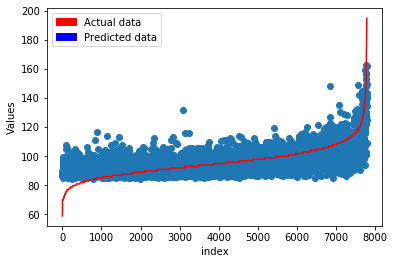

,t + 1,pred (t +1)
3270,171.0,149.006345
1750,174.0,156.453966
4722,175.0,134.511960
3966,176.0,109.206660
3433,182.0,143.518043
5278,188.0,124.994937
5527,190.0,141.670243
5103,193.0,149.771939
6455,195.0,140.411668
7080,195.0,162.292153


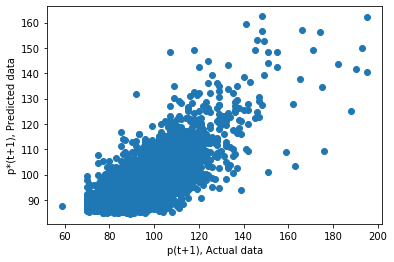

In [51]:

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(30)

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.tail(10)

In [52]:
# tempdata=pd.DataFrame(xtest.copy())
# tempdata['ytest']=ytest
# # temp=temp.dropna()
# # tempdata.head()
# # tempdata[tempdata.ytest.isna()].index

# tempdata=tempdata.drop(tempdata[tempdata.ytest.isna()].index)


xg boost
==========

In [53]:
import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# import pandas as pd
# import numpy as np

In [54]:
xg_reg = xgb.XGBRegressor()
# xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, 
#                           learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(xtrain, ytrain) 

[01:29:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [55]:

ypred = xg_reg.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

# ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
# ypredPD['t + 1']=ytest.values
# ypredPD['pred (t +1)']=ypred
# ypredPD.head(10)

mean_squared_error 61.75672619197282
root mean_squared_error 7.8585447884435204
mean_absolute_error 5.909727513858967
r2_score 0.48109264708694155


In [56]:
# ytest[ytest.isna()].shape
# tempdata.iloc[:,-1]

ANN
==========

In [58]:
model= Sequential()
model.add(Dense(input_dim=19,units=128,activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=128, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=64, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=32, activation='relu', kernel_initializer='uniform')) 
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=16, activation='relu', kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.25))  
model.add(Dense(units=8, activation='relu', kernel_initializer='uniform'))
model.add(Dense(units=1, kernel_initializer='uniform'))
model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mean_squared_error' ])

In [59]:
h=model.fit(xtrain, ytrain, validation_split=.2,epochs=100, batch_size=50)

W1004 01:30:06.831277   164 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 24937 samples, validate on 6235 samples
Epoch 1/100
24937/24937 [==============================] - 2s 70us/step - loss: 3466.0611 - mean_squared_error: 3466.0611 - val_loss: 223.7124 - val_mean_squared_error: 223.7124
Epoch 2/100
24937/24937 [==============================] - 1s 31us/step - loss: 408.2913 - mean_squared_error: 408.2913 - val_loss: 262.0882 - val_mean_squared_error: 262.0882
Epoch 3/100
24937/24937 [==============================] - 1s 32us/step - loss: 329.2152 - mean_squared_error: 329.2152 - val_loss: 2545.9635 - val_mean_squared_error: 2545.9635
Epoch 4/100
24937/24937 [==============================] - 1s 32us/step - loss: 286.4956 - mean_squared_error: 286.4956 - val_loss: 3514.3411 - val_mean_squared_error: 3514.3411
Epoch 5/100
24937/24937 [==============================] - 1s 31us/step - loss: 268.6574 - mean_squared_error: 268.6574 - val_loss: 131.6172 - val_mean_squared_error: 131.6172
Epoch 6/100
24937/24937 [==============================] - 1s 32u

24937/24937 [==============================] - 1s 32us/step - loss: 70.4709 - mean_squared_error: 70.4709 - val_loss: 97.8517 - val_mean_squared_error: 97.8517
Epoch 95/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.3885 - mean_squared_error: 70.3885 - val_loss: 78.2340 - val_mean_squared_error: 78.2340
Epoch 96/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.3243 - mean_squared_error: 70.3243 - val_loss: 65.7738 - val_mean_squared_error: 65.7738
Epoch 97/100
24937/24937 [==============================] - 1s 31us/step - loss: 69.9672 - mean_squared_error: 69.9672 - val_loss: 71.9764 - val_mean_squared_error: 71.9764
Epoch 98/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.7425 - mean_squared_error: 70.7425 - val_loss: 71.9981 - val_mean_squared_error: 71.9981
Epoch 99/100
24937/24937 [==============================] - 1s 31us/step - loss: 70.9729 - mean_squared_error: 70.9729 - val_loss: 79.1552 - val_mea

In [60]:
ypred=model.predict(xtest)

import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)

mean_squared_error 73.95340234275717
root mean_squared_error 8.599616406721708
mean_absolute_error 6.329188529569806
r2_score 0.3786107746497982


,t + 1,pred (t +1)
0,89.0,92.097168
1,106.0,97.246140
2,94.0,94.313225
3,97.0,91.301956
4,95.0,90.068474
5,99.0,92.388924
6,92.0,94.721748
7,93.0,93.327438
8,100.0,93.935234
9,102.0,95.853935


dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


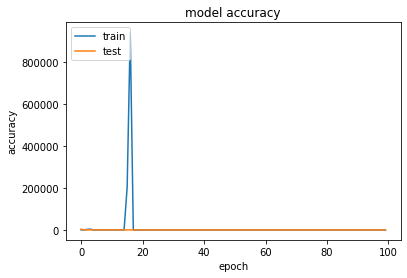

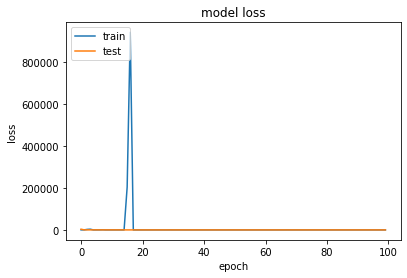

In [61]:
history=h
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['val_mean_squared_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [62]:
ypredPD['diff']=abs(ypredPD['t + 1']- ypredPD['pred (t +1)'])
print(np.mean(ypredPD['diff']))
print(np.std(ypredPD['diff']))
print(100*ypredPD[ypredPD['diff']<=5].shape[0]/ypredPD.shape[0])

6.329188529569806
5.821921924924723
50.981650198896446


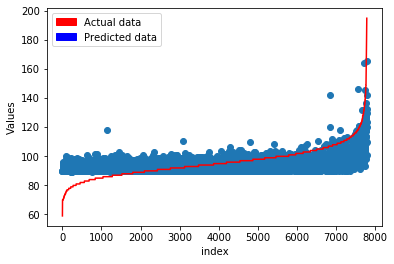

,t + 1,pred (t +1),diff
7409,59.0,90.086021,31.086021
1099,70.0,90.065338,20.065338
1135,70.0,90.083504,20.083504
7325,70.0,90.090096,20.090096
1923,70.0,90.064430,20.064430
6150,70.0,90.078682,20.078682
6940,70.0,89.735100,19.735100
7198,70.0,90.075302,20.075302
6727,70.0,90.069450,20.069450
5082,70.0,90.095238,20.095238


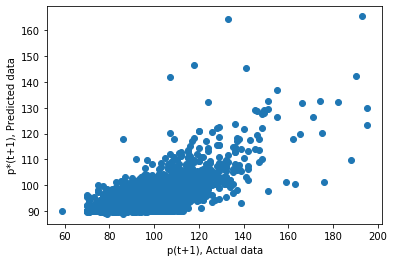

In [63]:

import matplotlib.patches as mpatches
plt.ylabel('Values')
plt.xlabel('index')
red_patch = mpatches.Patch(color='red', label='Actual data')
blue_patch = mpatches.Patch(color='blue', label='Predicted data')
plt.legend(handles=[red_patch,blue_patch])

ypredPD=ypredPD.sort_values(by=['t + 1'])
plt.scatter(np.arange(0,ypredPD.shape[0],1),ypredPD['pred (t +1)'][:ypredPD.shape[0]])
plt.plot(np.arange(0,ypredPD.shape[0],1),ypredPD['t + 1'][:ypredPD.shape[0]],color='red')
plt.show()

plt.ylabel('p*(t+1), Predicted data')
plt.xlabel('p(t+1), Actual data')
plt.scatter(ypredPD['t + 1'][:ypredPD.shape[0]],ypredPD['pred (t +1)'][:ypredPD.shape[0]])

ypredPD.head(10)

SVR
======

In [ ]:
from sklearn.svm import SVR
# svr_rbf = SVR(kernel='rbf', C=10, gamma=0.02, epsilon=.001)
svr_rbf = SVR(kernel='rbf')

In [ ]:
svr_rbf.fit(xtrain, ytrain) 

In [ ]:
ypred=svr_rbf.predict(xtest)

In [ ]:
import math
print('mean_squared_error',mean_squared_error(ytest, ypred))
print('root mean_squared_error',math.sqrt(mean_squared_error(ytest, ypred)))
print('mean_absolute_error',mean_absolute_error(ytest, ypred))
print('r2_score',r2_score(ytest, ypred))

ypredPD=pd.DataFrame()
# ypredPD['t']=xtest['S000501_x'].values
ypredPD['t + 1']=ytest.values.ravel()
ypredPD['pred (t +1)']=ypred
ypredPD.head(10)